# Homework 4:

## 1. Play with fasta files.

Create a program to analyse all the yeast sequences.

__FIRST CELL OF PROBLEM 1:__

a. Download all the coding sequences from yeast like in class.

In [4]:
import myFunctions as mf

seqfile = "Resources/testFasta.fas"

nucseqs, aaseqs = mf.readFasta(seqfile)
mf.writeFasta('Resources/protTest.txt', aaseqs)

from IPython.display import FileLink, FileLinks
FileLink('Resources/protTest.txt')

import urllib.request as urreq
url = "http://sgd-archive.yeastgenome.org/sequence/S288C_reference/orf_dna/orf_coding.fasta.gz"
try:
    urreq.urlretrieve(url,'./Resources/orf_coding.fasta.gz')  #first get the webpage you want
except:
    print("Something went wrong!")
else:
    print("Download worked!")

import gzip
nucFile = gzip.open('./Resources/orf_coding.fasta.gz', 'rb')
file_content = nucFile.read()

outfile = './Resources/orf_coding.fasta'
fileout = open(outfile, 'wb')
fileout.write(file_content)
fileout.close()
'''
nucFile  = './Resources/orf_coding.fasta'
protFile = './Resources/orf_trans.fasta'

nucseqs, aaseqs = mf.readFasta(nucFile)

mf.writeFasta(protFile, aaseqs)

FileLink('./Resources/orf_trans.fasta')
'''

Download worked!


"\nnucFile  = './Resources/orf_coding.fasta'\nprotFile = './Resources/orf_trans.fasta'\n\nnucseqs, aaseqs = mf.readFasta(nucFile)\n\nmf.writeFasta(protFile, aaseqs)\n\nFileLink('./Resources/orf_trans.fasta')\n"

__SECOND CELL OF PROBLEM 1:__

b. Use the functions in `myFunctions.py` to read all the sequences in the file.

c. Calculate GC content and length of each sequence.

d. Make a dictionary of dictionaries with the sequence name as the key, and GC content, length, the sequence of each gene and the protein sequence derived from translating the gene.

e. Write the results to a tab delimited file, one sequence per line. Each line should contain, the name of the sequence, GC content, length, DNA seq, and Protein Seq, each of these fields should be separated by tabs.

In [5]:
import myFunctions as mf

In [6]:
nucseq, aaseq = mf.readFasta(outfile)

In [8]:
nucseq

[('YAL068C PAU8 SGDID:S000002142, Chr I from 2169-1807, Genome Release 64-3-1, reverse complement, Verified ORF, "Protein of unknown function; member of the seripauperin multigene family encoded mainly in subtelomeric regions"',
  'ATGGTCAAATTAACTTCAATCGCCGCTGGTGTCGCTGCCATCGCTGCTACTGCTTCTGCAACCACCACTCTAGCTCAATCTGACGAAAGAGTCAACTTGGTGGAATTGGGTGTCTACGTCTCTGATATCAGAGCTCACTTAGCCCAATACTACATGTTCCAAGCCGCCCACCCAACTGAAACCTACCCAGTCGAAGTTGCTGAAGCCGTTTTCAACTACGGTGACTTCACCACCATGTTGACCGGTATTGCTCCAGACCAAGTGACCAGAATGATCACCGGTGTTCCATGGTACTCCAGCAGATTAAAGCCAGCCATCTCCAGTGCTCTATCCAAGGACGGTATCTACACTATCGCAAACTAG'),
 ('YAL067W-A YAL067W-A SGDID:S000028593, Chr I from 2480-2707, Genome Release 64-3-1, Uncharacterized ORF, "Putative protein of unknown function; identified by gene-trapping, microarray-based expression analysis, and genome-wide homology searching"',
  'ATGCCAATTATAGGGGTGCCGAGGTGCCTTATAAAACCCTTTTCTGTGCCTGTGACATTTCCTTTTTCGGTCAAAAAGAATATCCGAATTTTAGATTTGGACCCTCGTACAGAAGCTTATTGTCTAAGCCTGAATTCAGTCTGCTTT

In [7]:
n = 1
seqs=[x[n] for x in nucseq]
GC_content = 0
for string in seqs:
    for i in range(len(string)):
        if string[i] == "G" or string[i] == "C":
            GC_content += 1
        else:
            pass
print(GC_content)

#for elem in seqs:
    #print(len(elem))
    


3497124


In [8]:
for x in nucseq: 
  #print( x[1] )
  print(len(x[1]), " :", x[1])
# Printing output
# print(Output)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
def gc_content(genome):
    gc_count = 0
    genome_length = len(genome)

    for base in genome:
        if base == 'G' or base == 'C':
            gc_count += 1

    gc_content = gc_count / genome_length
    return gc_content

In [11]:
my_dict = {}
for x in nucseq:
  result = x[0].split(',', 1)[0]
  if result not in my_dict:
    my_dict[result] = []
  my_dict[result].append(len(x[1]))
  my_dict[result].append(gc_content(x[1]))
my_dict

{'YAL068C PAU8 SGDID:S000002142': [363, 0.49586776859504134],
 'YAL067W-A YAL067W-A SGDID:S000028593': [228, 0.41228070175438597],
 'YAL067C SEO1 SGDID:S000000062': [1782, 0.3608305274971942],
 'YAL065C YAL065C SGDID:S000001817': [387, 0.4418604651162791],
 'YAL064W-B YAL064W-B SGDID:S000002141': [381, 0.4540682414698163],
 'YAL064C-A TDA8 SGDID:S000002140': [381, 0.43832020997375326],
 'YAL064W YAL064W SGDID:S000000060': [285, 0.3684210526315789],
 'YAL063C-A YAL063C-A SGDID:S000028813': [291, 0.281786941580756],
 'YAL063C FLO9 SGDID:S000000059': [3969, 0.4464600655076846],
 'YAL062W GDH3 SGDID:S000000058': [1374, 0.4868995633187773],
 'YAL061W BDH2 SGDID:S000000057': [1254, 0.4840510366826156],
 'YAL060W BDH1 SGDID:S000000056': [1149, 0.44995648389904264],
 'YAL059W ECM1 SGDID:S000000055': [639, 0.40375586854460094],
 'YAL058W CNE1 SGDID:S000000054': [1509, 0.4340622929092114],
 'YAL056W GPB2 SGDID:S000000052': [2643, 0.39500567536889897],
 'YAL055W PEX22 SGDID:S000000051': [543, 0.4

In [1]:
#GC_count_DNA_seqs

In [4]:
#print(mf.readFasta('orf_trans.fasta'))
#num = 0
#for tup in seqs:
    #num +=1
#print(num)

print(len(seqs))


6034


__THIRD CELL OF PROBLEM 1:__

f. Make a histogram of the GC content of all yeast genes.

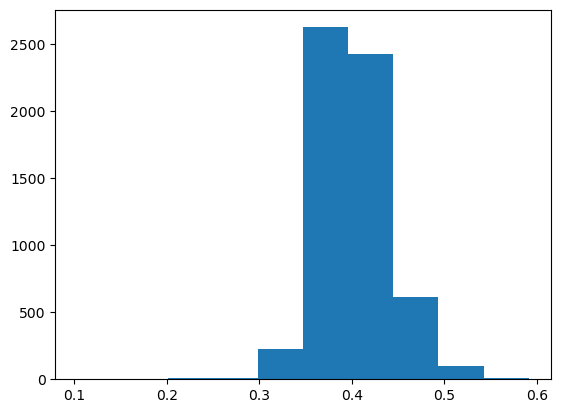

In [18]:
import matplotlib.pyplot as plt
gc = []
for i in my_dict.keys():
    gc.append(my_dict[i][1])
plt.hist(gc)
plt.show()

__FOURTH CELL OF PROBLEM 1:__

g. Make a histogram of the sequence length for all yeast genes.

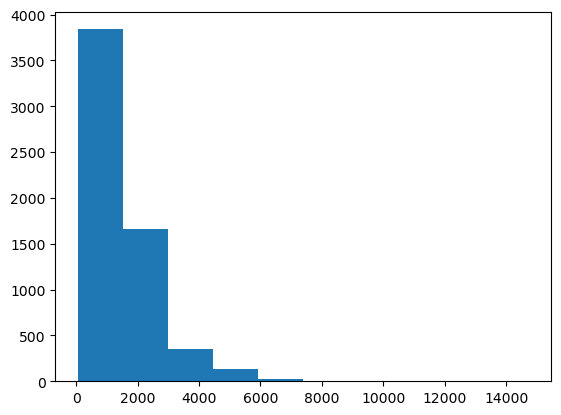

In [19]:
import matplotlib.pyplot as plt
leng = []
for i in my_dict.keys():
    leng.append(my_dict[i][0])
plt.hist(leng)
plt.show()

__FIFTH CELL OF PROBLEM 1:__

h. Make a 2D density plot of GC vs sequence length.

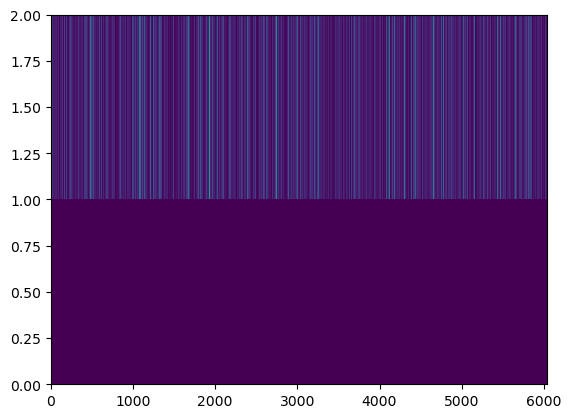

In [21]:
plt.pcolormesh([gc, leng])
plt.show()

## 2. PlotLy contour plot of BMI:

From wikipedia:

>The body mass index (BMI) or Quetelet index is a value derived from the mass (weight) and height of an individual. The BMI is defined as the body mass divided by the square of the body height, and is universally expressed in units of kg/m2, resulting from mass in kilograms and height in metres.

Create a function to calculate BMI from height and weight and make a 2D contour chart showing the BMI for heights between 1.4 and 2.2m and weights between 40 and 120kg, indicating the healthy range for BMI.

__FIRST CELL OF PROBLEM 2:__


a. Use numpy's linspace to have 100 points for height and 100 for weight.

b. We are going to use plotly's `Contour` plot, it takes as input a single variable, z. This should be a list of lists, which you can think of as a matrix. For each value of height, you should calculate BMI for all values of weight, put these in a list and the list to a list of lists. 

c. By the end of this cell you need three variables, a list (or numpy array) with the height values, a list (or numpy array) with the weight values, and a list of lists with the bmi values.

In [ ]:
height = float("100")
weight = float ("100")
BMI = weight / (height/100)**2
print(BMI)

In [ ]:
#generates a float range

import numpy as np
np.linspace()

: 

__SECOND CELL OF PROBLEM 2:__

d. Use plotly's `Contour` to create a graph like the one below:

![BMI Plot](bmi0.png)

__THIRD CELL OF PROBLEM 2:__

e. To be most useful, your contour plot should have only three levels, low bmi, good bmi, and high bmi. The cut-offs for these are 18 and 25, your graph should look like the one below (the colors don't matter).

![BMI Plot 2](bmi.png)